# Graph 1 Performer - Genre

# Performer-Genre Trends

## Purpose
Identify the popularity of different genres (e.g., music: pop, rock; sports: rugby, soccer) across the world by examining the performers and their associated genres. This graph will provide insights into:
- **Universally appealing genres**: Genres with broad, global appeal.
- **Locally preferred genres**: Genres that are popular in specific regions.

## Analysis
The graph will enable:
- **Popularity Analysis**: Highlighting genres that are broadly popular based on performer count and genre connections.
- **Niche Genres**: Identifying genres with limited appeal, primarily associated with a small number of performers.

## Data Needed
- **Performer Information**: Name and ID.
- **Genre Information**: Type and ID.
- **Relationships**: Connections between performers and the events they are associated with.

## Metric
**Degree Centrality**:  
The number of connections a node has.  
- In this context, the popularity of a genre will be measured based on the number of performers it is connected to.

## Graph Type
**Undirected Graph**:  
- Represents the mutual relationship between performers and genres.
- A performer belongs to a genre, and a genre represents its associated performers without implying directionality.

## Sketch
- **Nodes**: Performers and genres.
- **Edges**: Connections between performers and their corresponding genres.

In [18]:
# Performer-Genre Trends

import pandas as pd
import networkx as nx

file_path = 'data/artist_genre_data.csv'  # Replace with your file path
artist_genre_data = pd.read_csv(file_path)

# Create a new graph
G = nx.Graph()

# Add nodes and edges to the graph
for _, row in artist_genre_data.iterrows():
    artist = row['artist_name']
    genre = row['Genre']
    
    # Add nodes for artist and genre
    G.add_node(artist, type='artist')
    G.add_node(genre, type='genre')
    
    # Add an edge between the artist and the genre
    G.add_edge(artist, genre)

# Output basic graph info
print(f"Graph created with {G.number_of_nodes()} nodes and {G.number_of_edges()} edges.")


Graph created with 87 nodes and 79 edges.


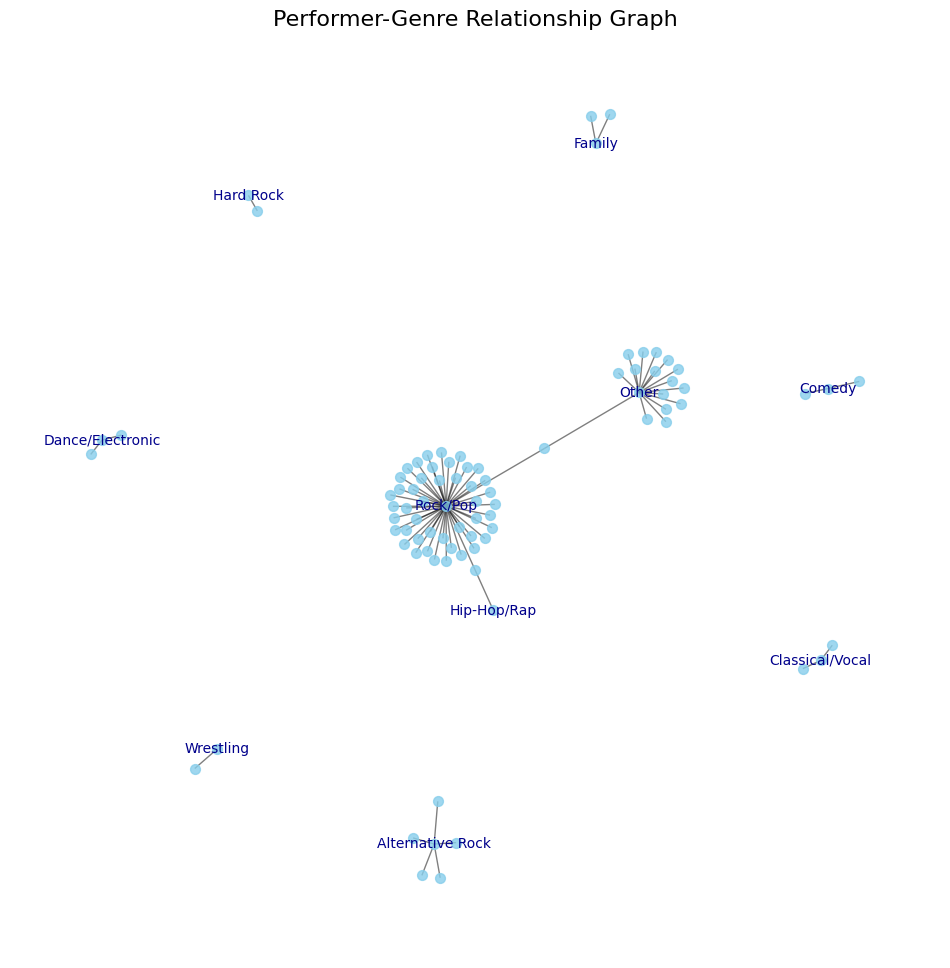

In [19]:
import networkx as nx
import matplotlib.pyplot as plt

# Plot the graph
plt.figure(figsize=(12, 12))  # Set the figure size

# Position nodes using a layout algorithm
pos = nx.spring_layout(G)  # Spring layout for a nice visualization

# Draw the nodes and edges
nx.draw_networkx_nodes(G, pos, node_size=50, node_color="skyblue", alpha=0.8)
nx.draw_networkx_edges(G, pos, alpha=0.5)

# Add labels to the graph
# Only label genres to reduce clutter
labels = {node: node for node, attr in G.nodes(data=True) if attr["type"] == "genre"}
nx.draw_networkx_labels(G, pos, labels, font_size=10, font_color="darkblue")

# Display the plot
plt.title("Performer-Genre Relationship Graph", fontsize=16)
plt.axis("off")  # Turn off the axis
plt.show()


In [20]:
import plotly.graph_objects as go

# Get positions for nodes
pos = nx.spring_layout(G)

# Prepare node traces for Plotly
node_x = []
node_y = []
node_labels = []
node_hover = []
node_colors = []

for node in G.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)
    
    # Use the node name as label if 'label' doesn't exist
    node_labels.append(G.nodes[node].get('label', node))
    node_hover.append(G.nodes[node].get('hover', f"Node: {node}"))
    
    # Determine node color based on its type
    node_colors.append('skyblue' if G.nodes[node].get('type') == 'artist' else 'orange')

node_trace = go.Scatter(
    x=node_x,
    y=node_y,
    mode='markers',
    marker=dict(
        size=10,
        color=node_colors,
        line_width=1
    ),
    text=node_labels,
    hovertext=node_hover,
    hoverinfo="text"
)

# Prepare edge traces for Plotly
edge_x = []
edge_y = []

for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

edge_trace = go.Scatter(
    x=edge_x,
    y=edge_y,
    line=dict(width=0.5, color="#888"),
    hoverinfo="none",
    mode="lines"
)

# Create the Plotly figure
fig = go.Figure(data=[edge_trace, node_trace],
                layout=go.Layout(
                    title="Performer-Genre Interactive Graph",
                    titlefont_size=16,
                    showlegend=False,
                    hovermode="closest",
                    margin=dict(b=0, l=0, r=0, t=40),
                    xaxis=dict(showgrid=False, zeroline=False),
                    yaxis=dict(showgrid=False, zeroline=False)
                ))

# Show the interactive graph
fig.show()


In [21]:
import plotly.graph_objects as go

# Get positions for nodes
pos = nx.spring_layout(G)

# Prepare node traces for Plotly
node_x = []
node_y = []
node_labels = []
node_hover = []
node_colors = []

for node in G.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)

    # Check node type and assign hover text and color accordingly
    if G.nodes[node].get('type') == 'artist':
        node_hover.append(f"Artist: {node}")
        node_colors.append('skyblue')
    elif G.nodes[node].get('type') == 'genre':
        node_hover.append(f"Genre: {node}")
        node_colors.append('orange')
    else:
        node_hover.append(f"Node: {node}")
        node_colors.append('gray')  # Default color if type is undefined
    
    # Use the node name as the label
    node_labels.append(node)

node_trace = go.Scatter(
    x=node_x,
    y=node_y,
    mode='markers',
    marker=dict(
        size=10,
        color=node_colors,
        line_width=1
    ),
    text=node_labels,
    hovertext=node_hover,
    hoverinfo="text"
)

# Prepare edge traces for Plotly
edge_x = []
edge_y = []

for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

edge_trace = go.Scatter(
    x=edge_x,
    y=edge_y,
    line=dict(width=0.5, color="#888"),
    hoverinfo="none",
    mode="lines"
)

# Create the Plotly figure
fig = go.Figure(data=[edge_trace, node_trace],
                layout=go.Layout(
                    title="Performer-Genre Interactive Graph",
                    titlefont_size=16,
                    showlegend=False,
                    hovermode="closest",
                    margin=dict(b=0, l=0, r=0, t=40),
                    xaxis=dict(showgrid=False, zeroline=False),
                    yaxis=dict(showgrid=False, zeroline=False)
                ))

# Show the interactive graph
fig.show()


In [22]:
import pandas as pd
from d3graph import d3graph
import streamlit as st

# # Load your dataset
# file_path = 'data/artist_genre_data.csv'  # Replace with your file path
# artist_genre_data = pd.read_csv(file_path)


# Prepare edge data for d3graph
edges = artist_genre_data[['artist_name', 'Genre']].rename(
    columns={'artist_name': 'source', 'Genre': 'target'}
)



# Get all unique nodes (artists + genres)
unique_nodes = pd.Index(edges['source']).union(edges['target'])
# Create a square adjacency matrix
adj_matrix = pd.DataFrame(0, index=unique_nodes, columns=unique_nodes)

# Initialize node properties directly from adjacency matrix nodes
node_colors = {node: 'skyblue' if node in edges['source'].values else 'orange' for node in adj_matrix.index}
node_labels = {node: f"Artist: {node}" if node in edges['source'].values else f"Genre: {node}" for node in adj_matrix.index}

# Fill in the connections
for _, row in edges.iterrows():
    adj_matrix.loc[row['source'], row['target']] += 1
    adj_matrix.loc[row['target'], row['source']] += 1  # Undirected graph

# Initialize d3graph
d3 = d3graph()

# Build the graph
d3.graph(adj_matrix)

# Set node properties
d3.set_node_properties(color=node_colors, label=node_labels)

# Export to HTML
d3.show(filepath='d3graph.html')

# Embed the graph into Streamlit
with open('d3graph.html', 'r') as f:
    html_content = f.read()

st.components.v1.html(html_content, height=700, scrolling=True)

[d3graph] INFO> Set directed=True to see the markers!
[d3graph] INFO> Keep only edges with weight>0
[d3graph] INFO> Converting source-target into adjacency matrix..
[d3graph] INFO> Making the matrix symmetric..
[d3graph] INFO> Converting adjacency matrix into source-target..
[clustimage] >WARNING> Colormap [Set2] can not create [9] unique colors! Available unique colors: [8].
[d3graph] WARNING> Colormap [Set2] can not create [9] unique colors! Available unique colors: [8].
[d3graph] INFO> Number of unique nodes: 87


KeyError: 0